Import thư viện


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\Consumer_Behavior-ShoppingHabits\shopping_behavior_updated.csv')

In [3]:
# Show data
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Check null value
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
# Check not null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
# Check data type of each columns
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [7]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [8]:
# Check unique value of column Age
df['Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [9]:
# Check unique value of column Gender
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
# Check unique value of column Item Purchased
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [11]:
# Check unique value of column Category
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [12]:
# Check unique value of column Location
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [13]:
# Check unique value of column Size
df['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [14]:
# Check unique value of column Color
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [15]:
# Check unique value of column Season
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [16]:
# Check unique value of column Shipping Type
df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [17]:
# Check unique value of column Payment Method
df['Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [18]:
# Check unique value of column Frequency of Purchase
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

Làm sạch dữ liệu

In [19]:
# Convert wrong datatype into correct datatype
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(int)
df['Customer ID'] = df['Customer ID'].astype(str)

In [20]:
# Check duplicate value
duplicated_data = df[df.duplicated()].sort_values('Customer ID', ascending=True)

In [21]:
# Show duplicate value
duplicated_data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


Trực quan hóa dữ liệu và khai thác thông qua biểu đồ

1. Phân khúc khách hàng

Theo nhóm tuổi: Phân khúc khách hàng theo nhóm tuổi để phân tích cách hành vi thay đổi theo độ tuổi.
Theo giới tính: Khám phá sự khác biệt trong mô hình mua sắm giữa khách hàng nam và nữ.
Theo tần suất mua hàng: Phân tích tần suất mua hàng của các khách hàng khác nhau và phân khúc họ thành các nhóm như hàng tuần, hai tuần một lần, hàng quý, v.v.


Q1: Có bao nhiêu khách hàng được phân đoạn theo nhóm tuổi?

In [22]:
# Age group bins
bins = [18, 25, 35, 45, 55, 65]

# Labels for age groups
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Create new Age Group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [23]:
# Lưu DataFrame vào file CSV
df.to_csv('dataset_with_age_groups.csv', index=False)

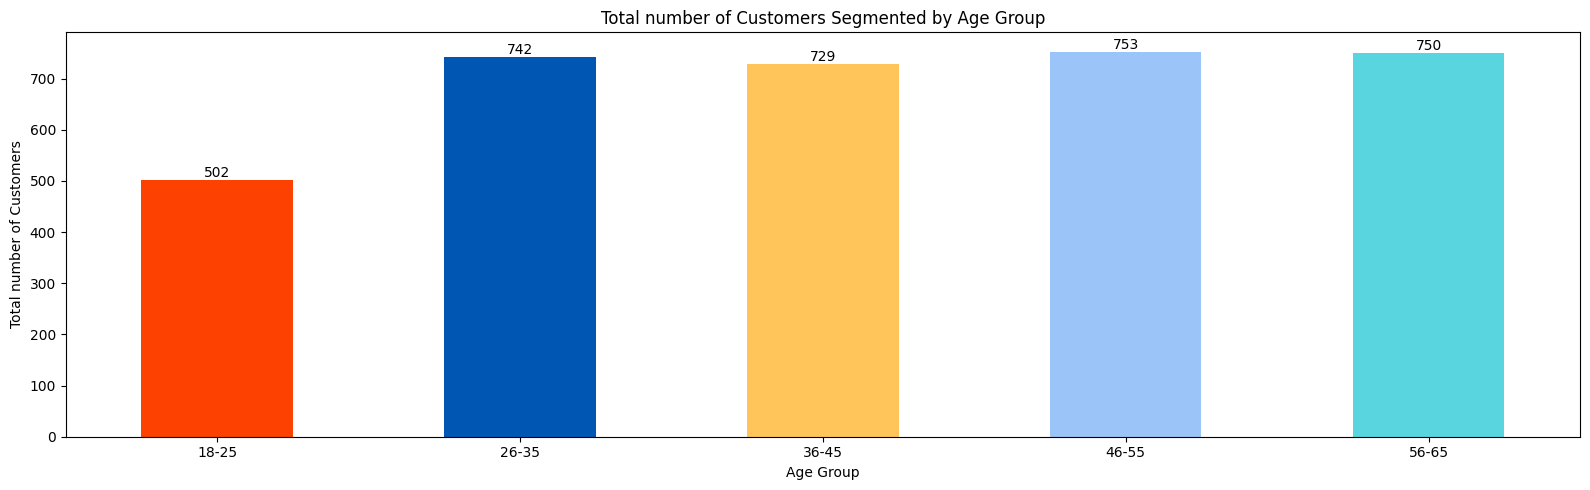

In [24]:
# Count total Customers by Age Group
total_customer_by_age_group = df['Age Group'].value_counts().sort_index()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the data as a bar chart
bars = total_customer_by_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Total number of Customers Segmented by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


Q2: Có bao nhiêu tổng số khách hàng dựa trên nhóm tuổi và giới tính?


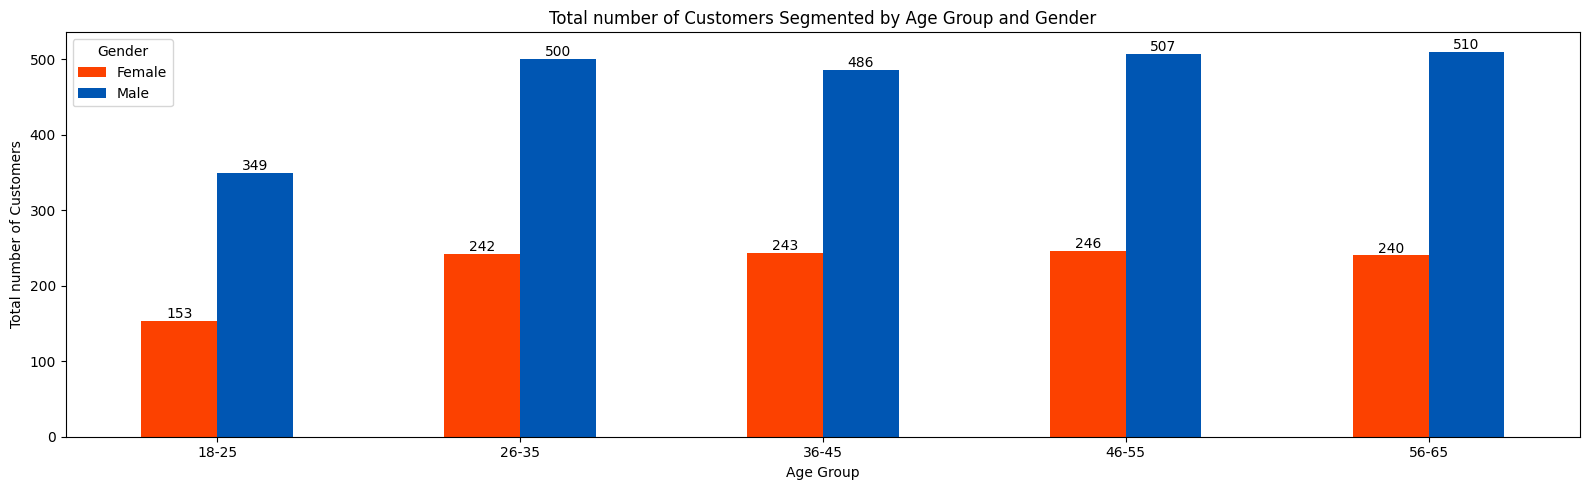

In [25]:
# Count total Customers by Age Group and Gender
total_customer_by_age_group_and_gender = df.groupby(['Age Group'])['Gender'].value_counts().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = total_customer_by_age_group_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Total number of Customers Segmented by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


Q3: Số tiền mua hàng trung bình (USD) theo nhóm tuổi là bao nhiêu?


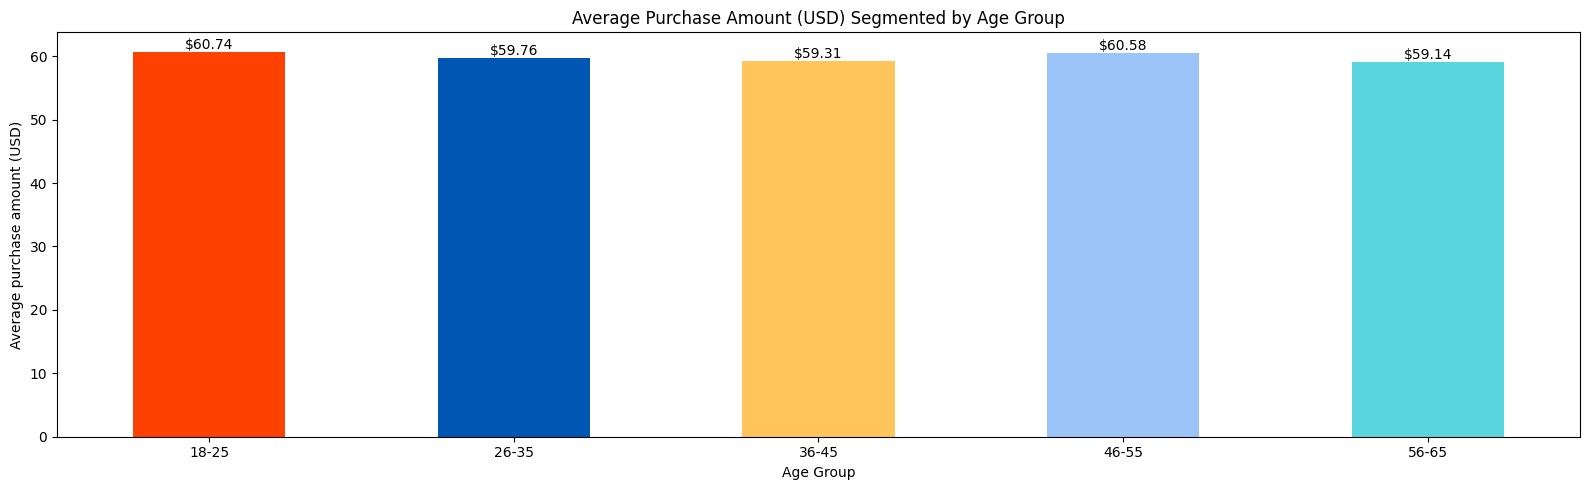

In [26]:
# Average Purchase Amount (USD) by Age Group
average_purchase_amount_by_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the data as a bar chart
bars = average_purchase_amount_by_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount (USD) Segmented by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average purchase amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


Q4: Số tiền mua hàng trung bình (USD) theo nhóm tuổi và giới tính là bao nhiêu?


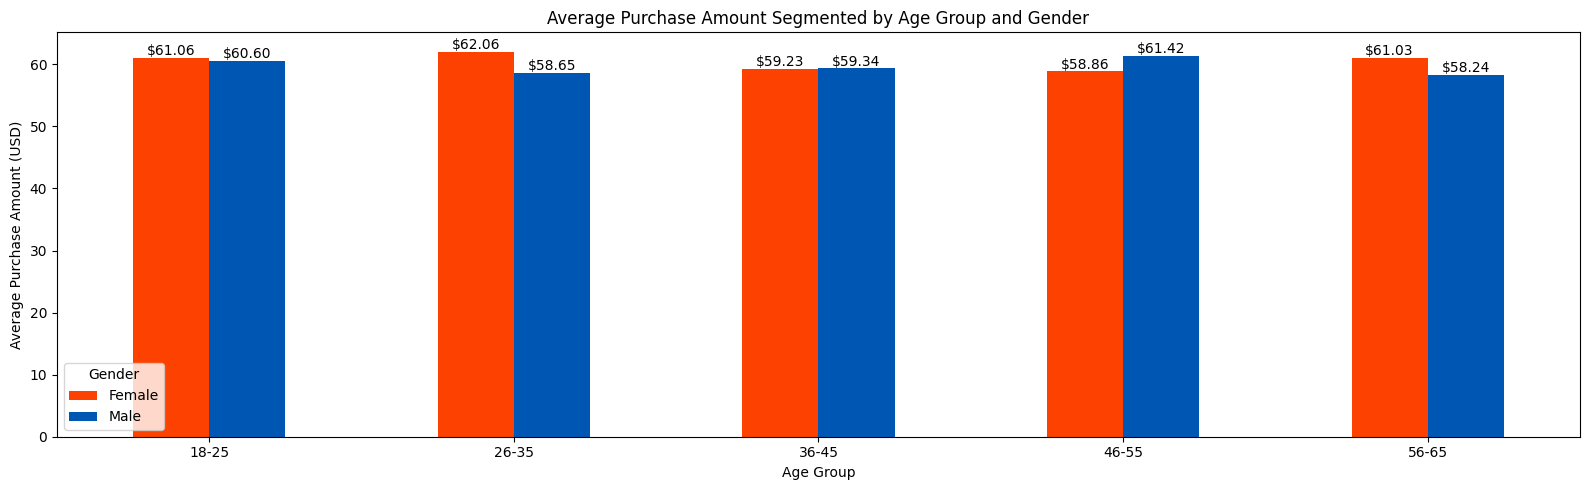

In [27]:
# Average Purchase Amount (USD) by Age Group and Gender
average_purchase_amount_by_age_group_and_gender = df.groupby(['Age Group', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = average_purchase_amount_by_age_group_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount Segmented by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


Q5: Số tiền mua hàng trung bình (USD) theo tần suất mua hàng là bao nhiêu?


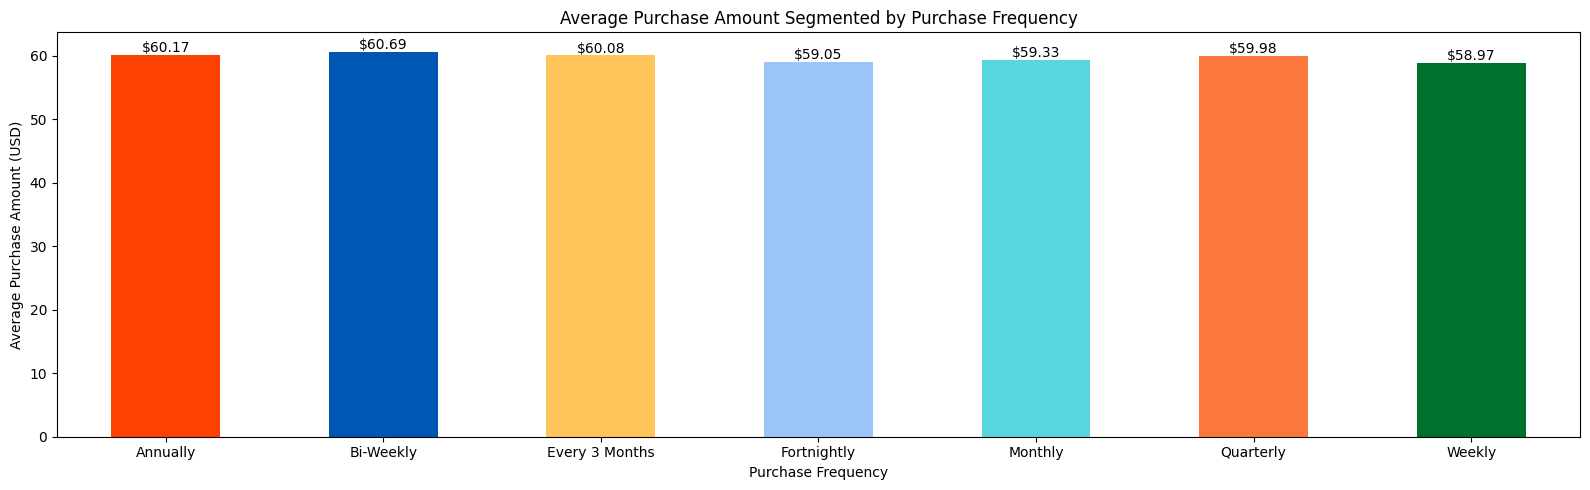

In [28]:
# Average Purchase Amount by Purchase Frequency
average_purchase_amount_by_purchase_fre = df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C', '#00712D']

# Plot the data as a bar chart
bars = average_purchase_amount_by_purchase_fre.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount Segmented by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


Q6: Số tiền mua hàng trung bình (USD) theo tần suất mua hàng và giới tính là bao nhiêu?

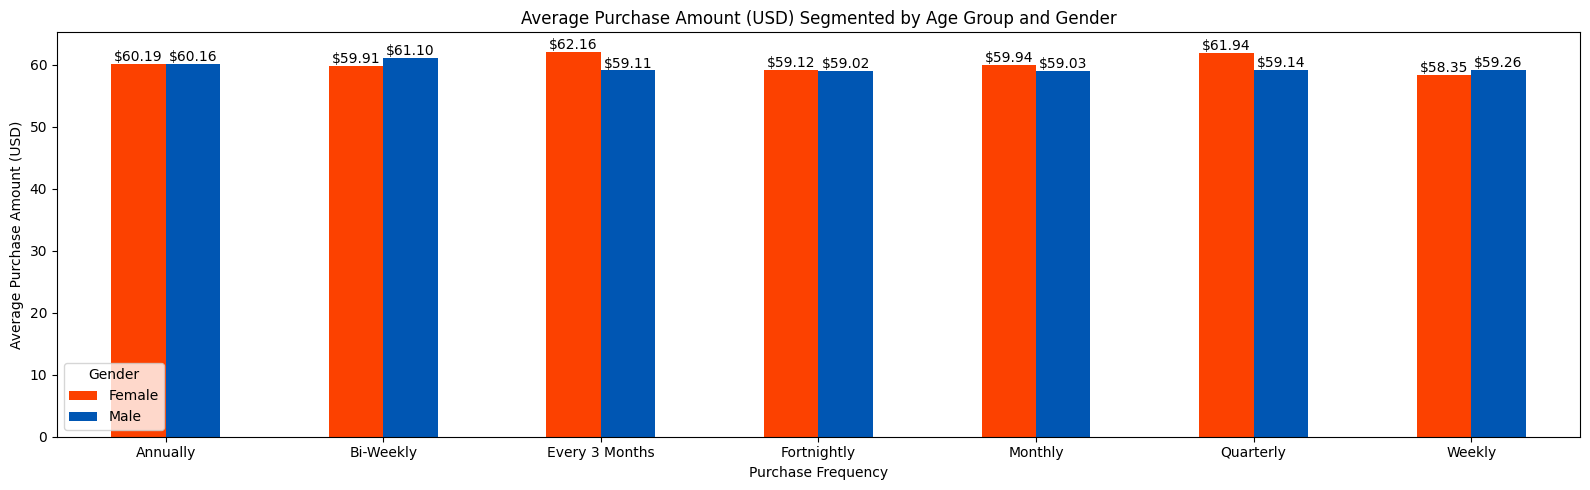

In [29]:
# Average Purchase Amount by Purchase Frequency and Gender
average_purchase_amount_by_purchase_fre_and_gender = df.groupby(['Frequency of Purchases', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = average_purchase_amount_by_purchase_fre_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount (USD) Segmented by Age Group and Gender')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


Q7: Có bao nhiêu tổng số khách hàng theo từng giới tính?


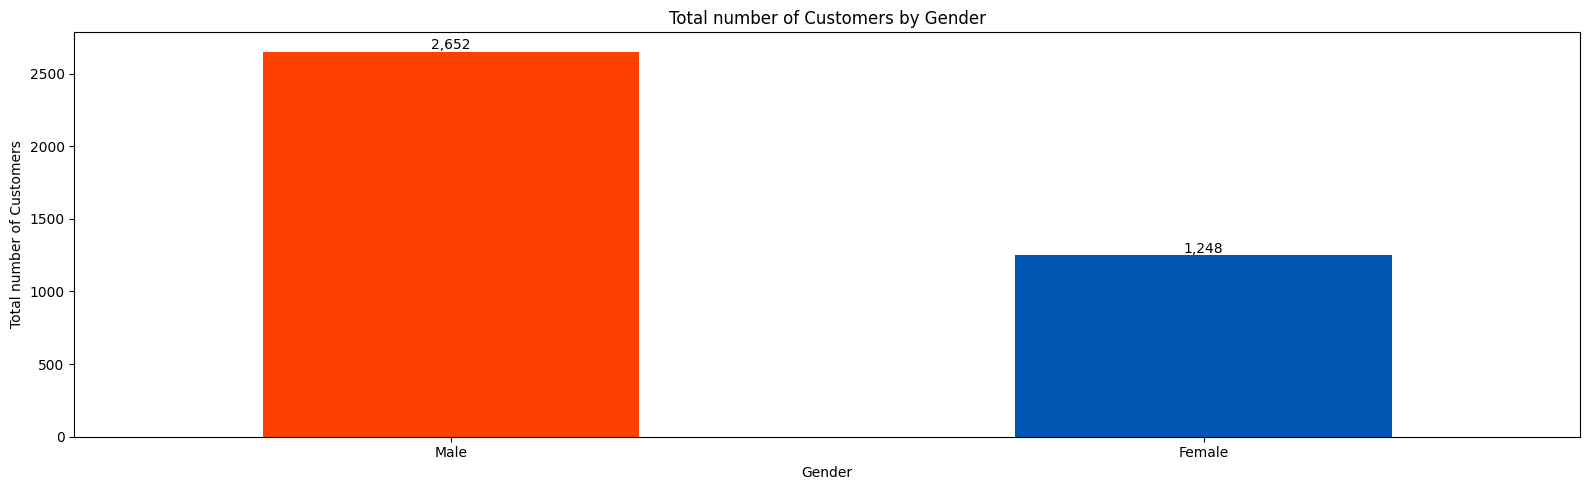

In [30]:
# Total number of Customers
total_spend_by_categories = df['Gender'].value_counts()
colors = ['#FC4100', '#0056B3']

# Plot data as a bar chart
bars = total_spend_by_categories.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Total number of Customers by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

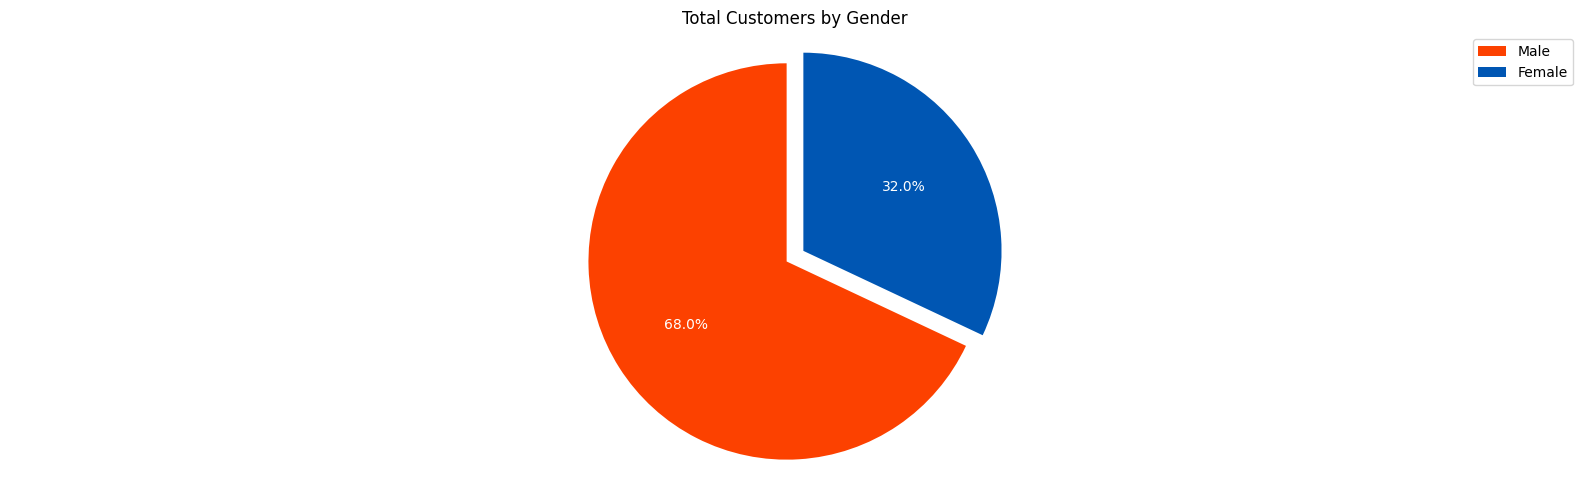

In [31]:
# Count total Customers by Gender
total_customers_by_gender = df['Gender'].value_counts()
colors = ['#FC4100', '#0056B3']

# Plot pie chart
plt.figure(figsize=(16, 5))
plt.pie(total_customers_by_gender, 
        labels=total_customers_by_gender.index, 
        colors=colors, 
        explode=(0, 0.1),  # Explode second slice
        autopct='%1.1f%%', 
        textprops={'color': '#ffffff'}, 
        startangle=90)

# Add title
plt.title('Total Customers by Gender')

# Add legend
plt.legend(labels=total_customers_by_gender.index, loc="best")

# Equal axis ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


2. Xu hướng mua hàng

Theo danh mục: So sánh số tiền khách hàng chi tiêu cho các danh mục khác nhau.
Theo địa điểm: Điều tra sự khác biệt khu vực trong hành vi mua hàng và chi tiêu của khách hàng.
Theo mặt hàng đã mua: Xem xét mức độ phổ biến của các mặt hàng khác nhau như Áo blouse, Áo len, Quần jeans, v.v., để xác định các mặt hàng bán chạy nhất.



Q1: Khách hàng chi tiêu bao nhiêu tiền cho các danh mục khác nhau?


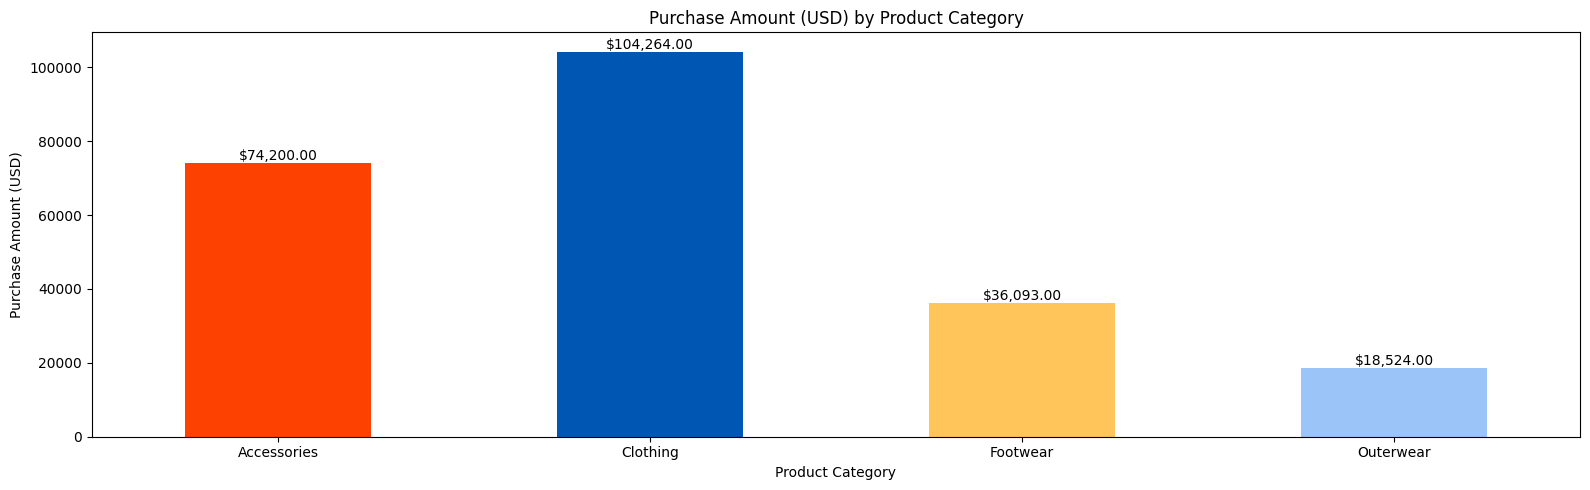

In [32]:
# Total Purchase Amount of Customer spends on different Product Categories
total_spend_by_categories = df.groupby(['Category'])['Purchase Amount (USD)'].sum()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8']

# Plot data as a bar chart
bars = total_spend_by_categories.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Product Category')
plt.xlabel('Product Category')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

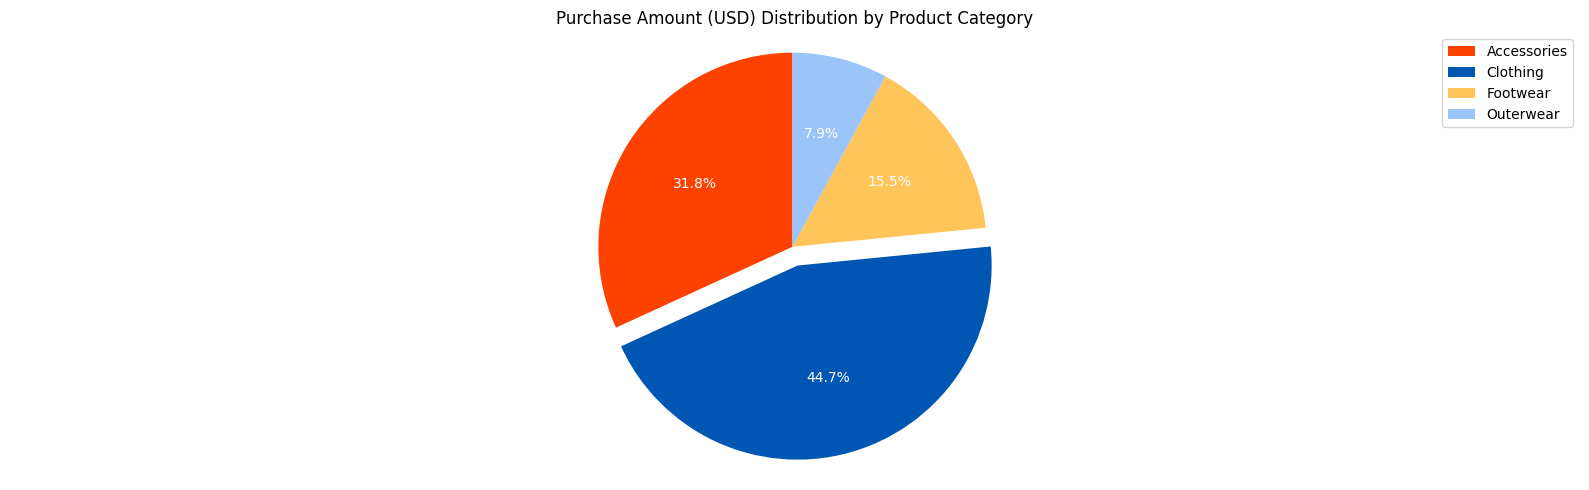

In [33]:
# Total Purchase Amount of Customer spends on different Product Categories
total_spend_by_categories = df.groupby(['Category'])['Purchase Amount (USD)'].sum()
colors=['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8']

# Plot data as a pie chart
plt.figure(figsize=(16, 5))
explode = [0.1 if i == total_spend_by_categories.idxmax() else 0 for i in total_spend_by_categories.index]

# Add datalabel into the pie chart
plt.pie(total_spend_by_categories, 
        labels=total_spend_by_categories.index, 
        autopct='%1.1f%%', 
        explode=explode,
        textprops={'color': '#ffffff'},
        startangle=90, 
        colors=colors)

# Add title
plt.title('Purchase Amount (USD) Distribution by Product Category')

# Add legend
plt.legend(labels=total_spend_by_categories.index, loc="best")

# Show the plot
plt.axis('equal') 

# Show the plot
plt.tight_layout()
plt.show()


Q2: Khách hàng chi tiêu bao nhiêu tiền cho các danh mục khác nhau theo giới tính?


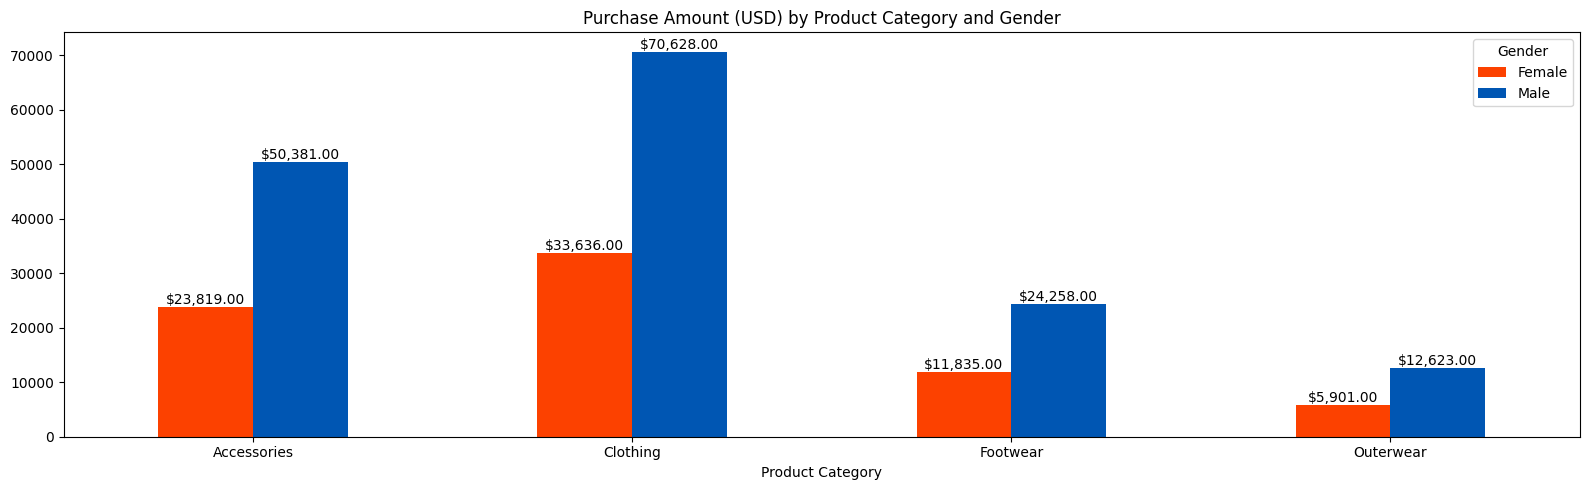

In [34]:
# Total Purchase Amount Customer spends by different Product Categories and Gender
total_spend_by_categories_and_gender = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].sum().unstack()
colors=['#FC4100', '#0056B3']

# Plot data as a bar chart
bars = total_spend_by_categories_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Product Category and Gender')
plt.xlabel('Product Category')
plt.xticks(rotation=0, ha='center')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

Q3: Khách hàng chi tiêu bao nhiêu tiền cho các danh mục khác nhau theo nhóm tuổi?

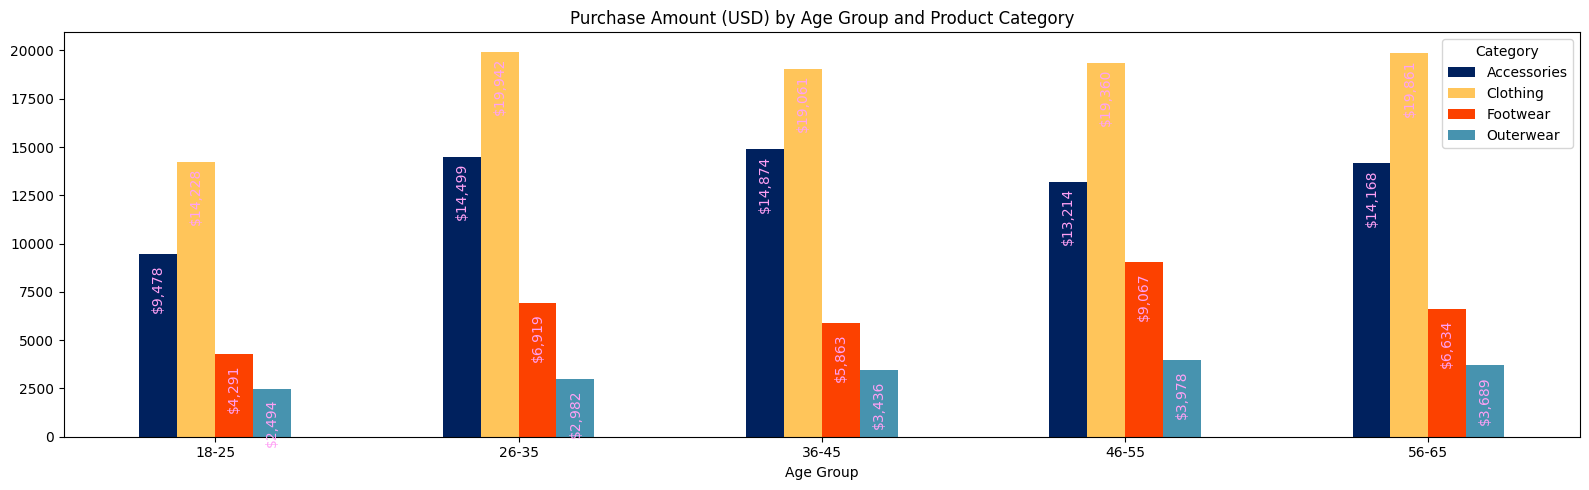

In [35]:
# Total Purchase Amount Customer spends by different Product Categories
total_spend_by_categories_and_age_group = df.groupby(['Age Group', 'Category'])['Purchase Amount (USD)'].sum().unstack()
colors = ['#00215E', '#FFC55A', '#FC4100', '#4793AF']

# Plot data as a bar chart
bars = total_spend_by_categories_and_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Age Group and Product Category')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.0f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  color='#FFA1F5',
                  textcoords='offset points',
                  xytext=(0, -25),
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Q4: Khách hàng chi tiêu bao nhiêu tiền dựa trên địa điểm?

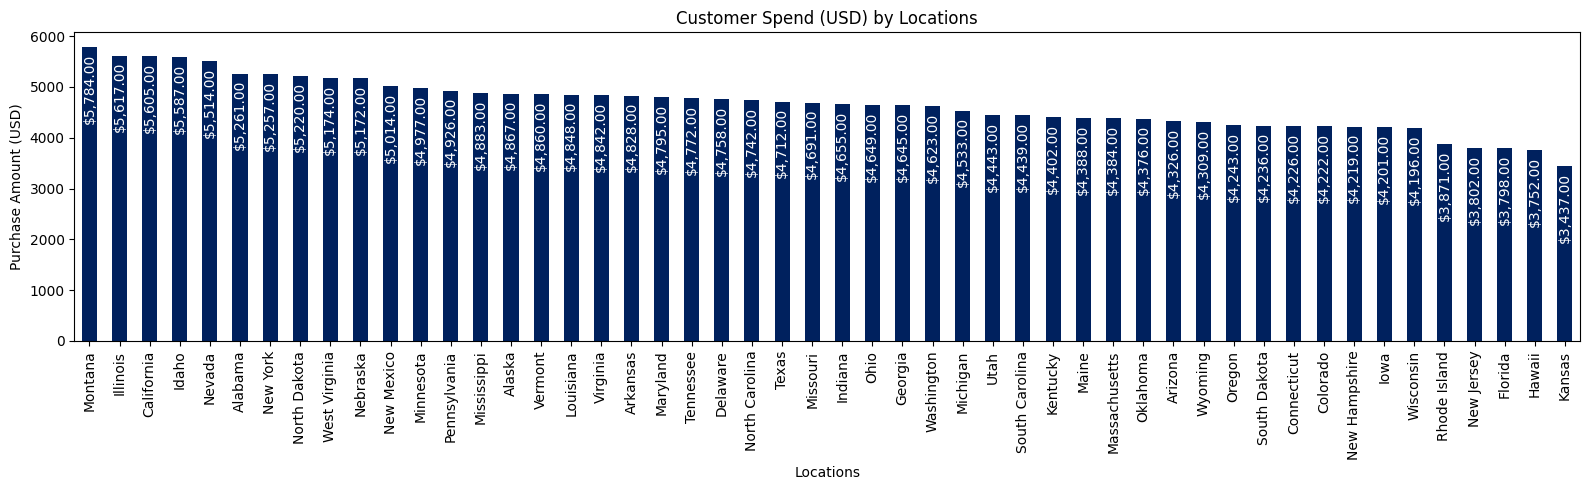

In [36]:
# Caculate customer spend based on Location
customer_spend_by_location = df.groupby(['Location'])['Purchase Amount (USD)'].sum().sort_values(ascending=False)
colors = ['#00215E']

# Plot data as a bar chart
bars = customer_spend_by_location.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Customer Spend (USD) by Locations')
plt.xlabel('Locations')
plt.xticks(rotation=90)
plt.ylabel('Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  color='#ffffff',
                  xytext=(0, -30),
                  textcoords='offset points',
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()